# Cannabis Recreational Store Growth Analysis in Canada
This notebook provides an analysis of the recreational store growth of cannabis in Canada. The analysis includes data importation, cleaning, summary statistics, and visualizations to understand the trends in cannabis sales, production, and inventory.


## Data Import and Cleaning
First, we import the dataset and clean it by handling missing values and converting data types appropriately.


In [1]:

import pandas as pd

# Load the dataset
file_path = 'Cannabis_Data.csv'
cannabis_data = pd.read_csv(file_path)

# Convert 'year_-_month' to datetime format and clean numeric columns
cannabis_data['year_-_month'] = pd.to_datetime(cannabis_data['year_-_month'].str.strip(), format='%Y-%m', errors='coerce')
numeric_columns = ['unpackaged_production_units', 'unpackaged_inventory_units', 
                   'packaged_production_units', 'packaged_inventory_units_-_federal_licence_holders',
                   'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                   'sales_units_-_medical', 'sales_units_-_non-medical',
                   'unpackaged_production_kilograms', 'unpackaged_inventory_kilograms',
                   'packaged_production_kilograms', 'packaged_inventory_kilograms_-_federal_licence_holders',
                   'packaged_inventory_kilograms_-_provincial_distributors_and_reta',
                   'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].replace('n/a\xa0/ n/d', pd.NA)
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))


## Summary Statistics
Next, we compute summary statistics for the relevant columns to understand the data distribution.


In [2]:

summary_statistics = cannabis_data.describe()
summary_statistics.loc[:, ['packaged_production_units', 
                           'packaged_inventory_units_-_federal_licence_holders', 
                           'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                           'sales_units_-_medical', 'sales_units_-_non-medical']]


,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
count,2.700000e+02,2.700000e+02,2.700000e+02,270.000000,2.700000e+02
mean,2.681744e+06,5.957971e+06,4.287431e+06,104952.218519,2.102976e+06
std,3.514292e+06,7.046292e+06,5.518576e+06,114698.058167,2.964662e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.226750e+03,2.995950e+04,4.559700e+04,153.000000,2.933250e+03
50%,1.352645e+05,3.311810e+05,2.659470e+05,19844.000000,4.846650e+04
75%,4.385962e+06,1.099049e+07,7.377674e+06,226466.500000,3.463538e+06
max,1.219278e+07,2.175964e+07,1.907019e+07,354673.000000,1.038313e+07


Summary

1. Packaged Production Units:

- Average: On average, there are about 2.68 million packaged production units. This suggests a significant level of production activity.
- Variability: The large standard deviation indicates that the number of production units varies widely from one period to another, which could be due to seasonal production changes, market demand, or regulatory impacts.

2. Packaged Inventory at Federal License Holders:

- Average: The average inventory held by federal license holders is around 5.96 million units. This is a substantial inventory, suggesting a well-stocked supply chain.
- Variability: High variability here also indicates that inventory levels fluctuate significantly, which could be due to varying production rates, changes in demand, or inventory management strategies.

3. Packaged Inventory at Provincial Distributors and Retailers:

- Average: The average inventory at provincial distributors and retailers is approximately 4.29 million units. This indicates that a considerable amount of cannabis products are available at the retail and distributor level.
- Variability: Similar to the federal license holders, the high variability here suggests fluctuating inventory levels, possibly influenced by consumer demand and supply chain dynamics.

4. Sales Units - Medical:

- Average: The average sales for medical purposes are about 105,000 units. Compared to non-medical sales, this is relatively lower, indicating a smaller but consistent market segment.
- Variability: The wide range in sales units might reflect differences in medical cannabis needs over time or varying patient counts.

5. Sales Units - Non-Medical:

- Average: The average non-medical sales units are about 2.10 million, showing a much larger market for recreational cannabis compared to medical cannabis.
- Variability: The high standard deviation indicates that sales volumes vary significantly, which might be influenced by consumer preferences, promotional activities, or market maturity.

## Data Visualization
We create visualizations to better understand the trends and patterns in these data points, particularly focusing on the growth over time and differences between medical and non-medical sales.


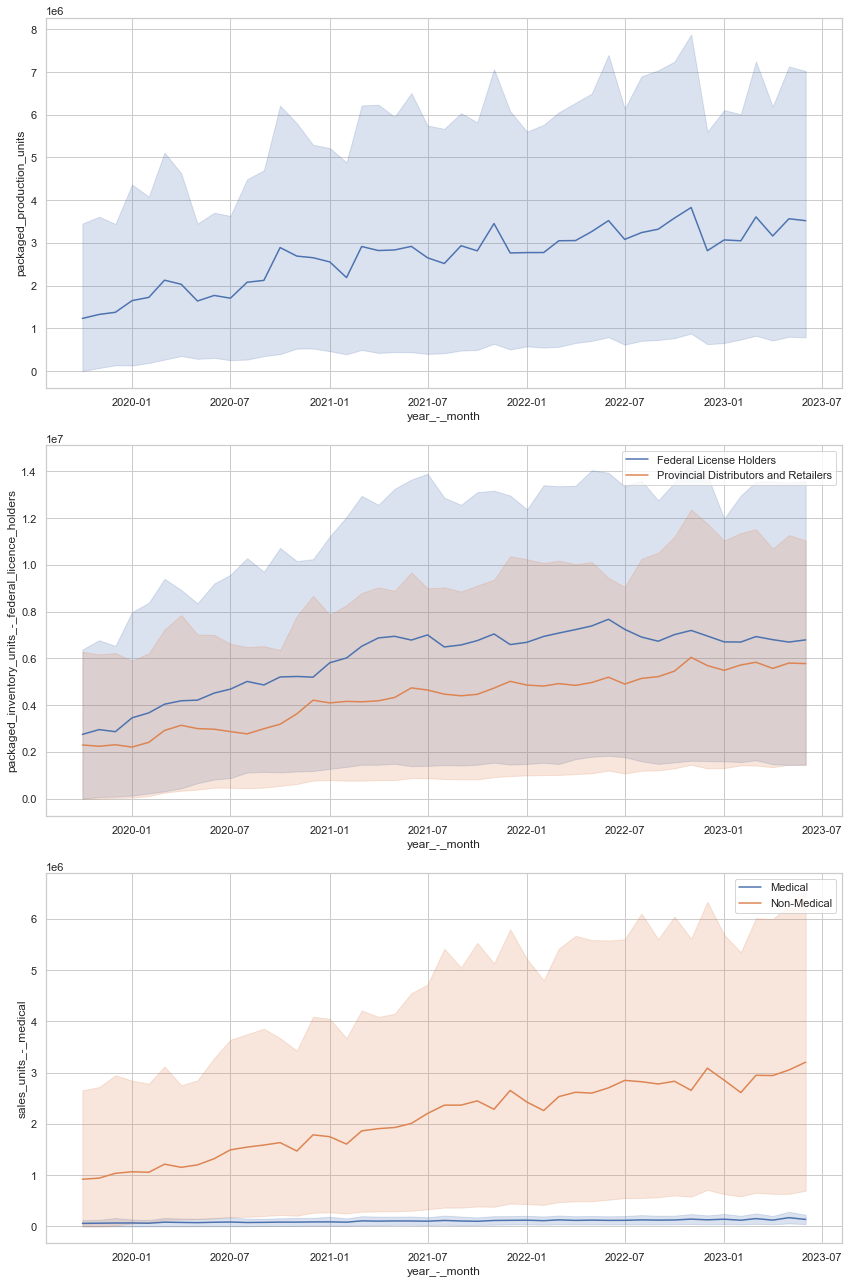

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating time series plots for key metrics
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
sns.lineplot(ax=axes[0], x='year_-_month', y='packaged_production_units', data=cannabis_data)
sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_federal_licence_holders', data=cannabis_data, label='Federal License Holders')
sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_provincial_distributors_and_retailer', data=cannabis_data, label='Provincial Distributors and Retailers')
sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_medical', data=cannabis_data, label='Medical')
sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_non-medical', data=cannabis_data, label='Non-Medical')
plt.tight_layout()



1. Packaged Production Units Over Time:

- This graph shows how the production of packaged cannabis units has changed over time.
- Key Insight: There may be noticeable trends or fluctuations in production. These could be influenced by market demands, changes in regulations, or other industry dynamics. The audience should look for periods of significant growth or decline, which might indicate important market shifts.

2. Packaged Inventory Units Over Time:
- This chart compares inventory levels at two key stages: federal license holders and provincial distributors/retailers.
- Key Insight: By looking at how inventory levels change over time, we can understand how effectively the cannabis supply is being managed. Sharp increases or decreases might indicate changes in production strategies, shifts in demand, or alterations in regulatory frameworks.

3. Sales Units Over Time (Medical vs. Non-Medical):
- This visualization shows a comparison between sales units for medical purposes and those for non-medical (recreational) use.
- Key Insight: The trends here indicate the relative growth and demand in the medical versus recreational cannabis markets. A rising trend in non-medical sales, for instance, would suggest an expanding recreational market. The audience should note how these two sectors contrast with each other over time.

Overall Summary for the Audience:
These visualizations collectively provide a comprehensive view of the Canadian cannabis market, highlighting key aspects such as production, inventory management, and sales trends.
The data reveals the dynamic nature of the market, with significant fluctuations that could be driven by a variety of factors including consumer behavior, regulatory changes, and market maturity.
The clear difference in the scale of medical versus non-medical sales highlights the dominant role of the recreational cannabis market in Canada.
Understanding these trends is crucial for stakeholders in the cannabis industry, as they offer insights into market performance, consumer preferences, and potential areas for growth or improvement.

## Product Type Analysis for Non-Medical Use
We further analyze the data to compare the growth of different product types for non-medical use.


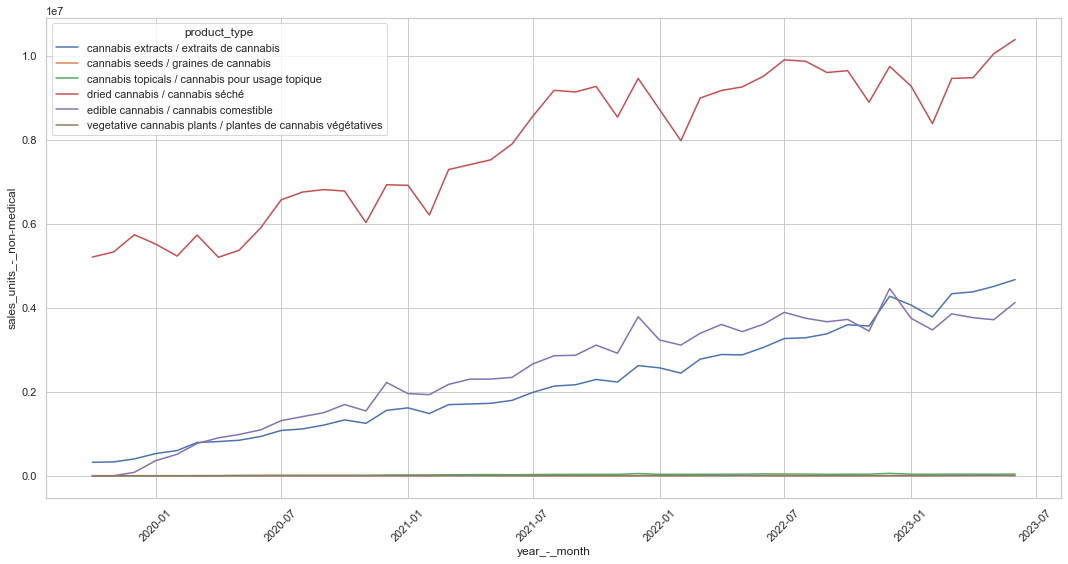

In [4]:

# Filtering and grouping data for non-medical use
non_medical_data = cannabis_data[cannabis_data['sales_units_-_non-medical'].notnull()]
grouped_data = non_medical_data.groupby(['year_-_month', 'product_type'])['sales_units_-_non-medical'].sum().reset_index()

# Visualization
plt.figure(figsize=(15, 8))
sns.lineplot(x='year_-_month', y='sales_units_-_non-medical', hue='product_type', data=grouped_data)
plt.xticks(rotation=45)
plt.tight_layout()


## Overview
The analysis focused on comparing the growth and sales trends of different cannabis product types for non-medical (recreational) use over time. The product types included various forms of cannabis, such as extracts, seeds, etc.

### Key Findings
Diverse Growth Patterns: Each product type displayed its own unique growth pattern. Some showed steady increases in sales over time, indicating growing popularity, while others had more fluctuating trends, suggesting varying consumer interest or seasonal influences.

Product Popularity: The visualization highlighted which product types were more popular in the recreational market. Products with consistently high sales might represent strong consumer preferences.

Market Dynamics: The analysis provided insights into how the recreational cannabis market is evolving. Newer products might show rapid growth, indicating successful market introductions, while traditional products might have more stable sales.

Seasonality and Trends: The trends over time also gave clues about possible seasonality effects (e.g., higher sales in certain months) and other market dynamics, such as how regulatory changes or market events impact different product types.

### Conclusion of Cannabis Recreational Store Growth Analysis in Canada
The comprehensive analysis of the recreational cannabis market in Canada, focusing on production, inventory, sales, and product types, has yielded several valuable insights:

1. Market Activity and Growth: The Canadian recreational cannabis market exhibits significant activity, with large volumes in production and sales. The data shows a dynamic market with growth potential, especially in the non-medical sector.

2. Production and Inventory Trends: The analysis of packaged production and inventory units reveals substantial numbers with notable fluctuations. This variability might be influenced by factors such as market demand, regulatory changes, and supply chain dynamics. The data indicates a responsive industry capable of adjusting to varying market conditions.

3. Sales Analysis: The comparison between medical and non-medical sales highlights a stronger market presence in the non-medical sector. This suggests a shift in consumer preference towards recreational cannabis use, with the potential for continued growth in this segment.

4. Product Type Popularity: The product type analysis for non-medical use reveals diverse growth patterns across different cannabis products. Understanding these trends is key for businesses to align their product offerings with consumer preferences and market demand.

5. Visual Insights: The visualizations provide a clear depiction of trends and patterns, making the complex data more accessible and understandable. They illustrate how different aspects of the market have evolved over time and offer a visual narrative of the cannabis industry's journey.

6. Strategic Implications: These insights are crucial for stakeholders in the cannabis industry, including producers, retailers, policymakers, and investors. The findings can inform strategic decisions related to production planning, inventory management, marketing strategies, and regulatory compliance.